1-Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity. \
2-Figure out if any preprocessing such as scaling would help here\
Draw elbow plot and from that figure out optimal value of k

In [17]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
iris = load_iris()


In [19]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


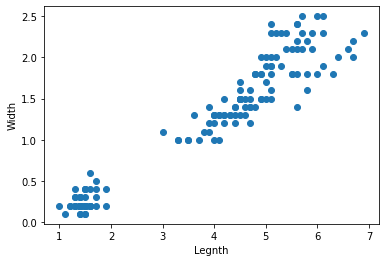

In [23]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Legnth')
plt.ylabel('Width')
plt.show()

In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [26]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [27]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

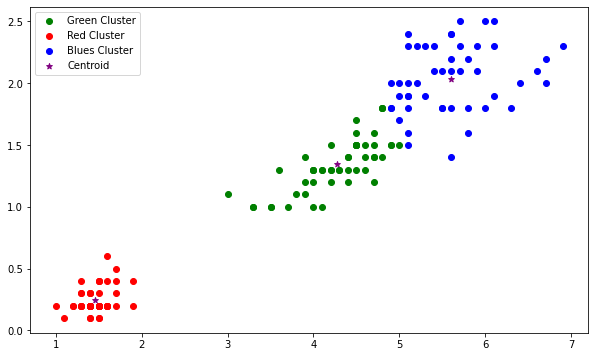

In [31]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',label='Green Cluster')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',label='Red Cluster')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',label='Blues Cluster')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='purple',label='Centroid')
plt.legend()
plt.show()
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  #To make it large 

In [32]:
k_rnge = range(1,11)
sse = []
for k in k_rnge:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)

In [33]:
sse

[650.7886666666665,
 186.27970291146767,
 31.37135897435897,
 22.646545454545464,
 14.197400098993567,
 11.415117424242421,
 9.441681889506373,
 7.9922077694235565,
 6.9192337434495315,
 5.979930318219791]

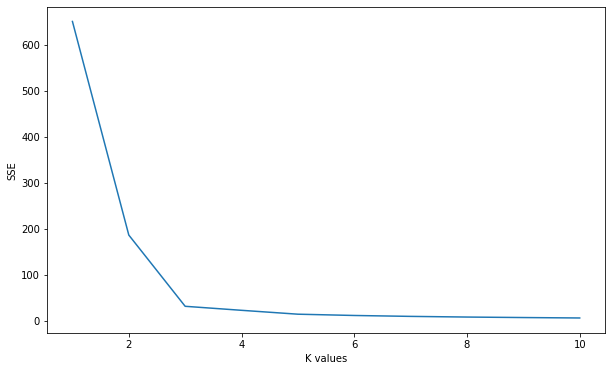

In [34]:
plt.plot(k_rnge , sse)
plt.xlabel('K values')
plt.ylabel('SSE')
plt.show()